In [7]:
from BODdata import BOD, BOD2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [8]:
x_bod = BOD[:, 0]
y_bod = BOD[:, 1]

x_bod2 = BOD2[:, 0]
y_bod2 = BOD2[:, 1]

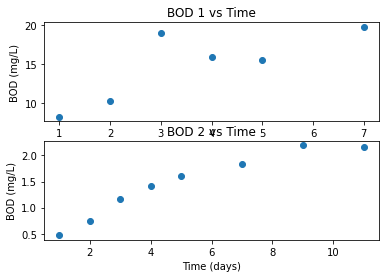

In [9]:
#Plot
fig, axs = plt.subplots(2, 1)

axs[0].plot(x_bod, y_bod, 'o')
axs[0].set_xlabel('Time (days)')
axs[0].set_ylabel('BOD (mg/L)')
axs[0].set_title('BOD 1 vs Time')

axs[1].plot(x_bod2, y_bod2, 'o')
axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('BOD (mg/L)')
axs[1].set_title('BOD 2 vs Time')

plt.show()

In [10]:
#Make a nonlinear regression and plot the residuals

def model(t, p1, p2):
    return p1 * (1 - np.exp(-p2 * t))

popt, pcov = curve_fit(model, x_bod, y_bod)

print(f"popt: {popt}" + "\n")
print(f"pcov: {pcov}" + "\n")

residuals = y_bod - model(x_bod, *popt)
sum_of_squared_residuals = sum(residuals**2)
print(f"residuals: {residuals}")

#Vad är skillnaden?
variance = np.var(residuals) #vad är detta?
variance_manual = sum_of_squared_residuals / (len(x_bod) - 2) #vad är detta?

print(f"variance: {variance}" + "\n")
print(f"variance_manual: {variance_manual}" + "\n")

popt: [19.14257663  0.53109125]

pcov: [[ 6.22977601 -0.43226011]
 [-0.43226011  0.04124   ]]

residuals: [ 0.41255027 -2.22497839  3.74832633 -0.85486963 -2.19748954  1.12242065]
variance: 4.331710227054663

variance_manual: 6.497566820485975



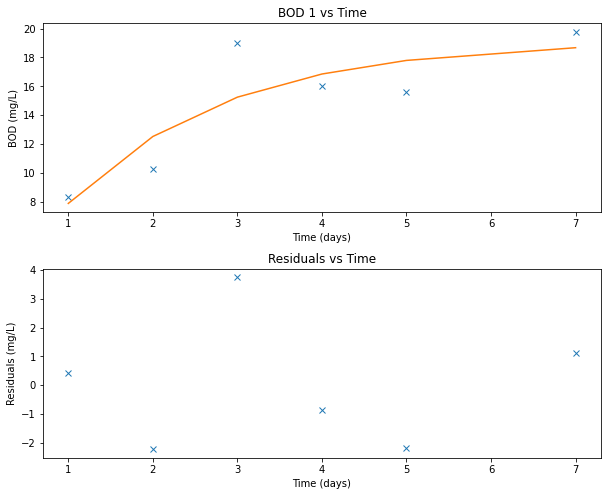

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(x_bod, y_bod, 'x')
axs[0].plot(x_bod, model(x_bod, *popt))
axs[0].set_xlabel('Time (days)')
axs[0].set_ylabel('BOD (mg/L)')
axs[0].set_title('BOD 1 vs Time')

axs[1].plot(x_bod, residuals, 'x')
axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('Residuals (mg/L)')
axs[1].set_title('Residuals vs Time')

#Set some whitespace between the plots
plt.subplots_adjust(hspace=0.3)